# Análise de Risco no Transporte Público

O principal objetivo desse projeto é responder 10 perguntas sobre os dados, são elas:

1. Qual a quantidade de incidentes por gênero?
2. Qual faixa etária esteve mais envolvida nos incidentes?
3. Qual o percentual de incidentes por tipo de evento (Incident Event Type)?
4. Como foi a evolução de incidentes por mês ao longo do tempo?
5. Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?
6. Qual foi a média de incidentes por mês envolvendo crianças (Child)?
7. Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
8. No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
9. Considerando o Operador qual a distribuição de incidentes ao longo do tempo?
10. Qual o tipo de incidente mais comum com ciclistas?

## Importando Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

# Formatação dos gráficos
plt.figure(figsize = (10, 6))
# matplotlib.use('nbAgg')
plt.rcParams.update({'figure.max_open_warning': 0})
sns.set_style('whitegrid')

<Figure size 1000x600 with 0 Axes>

Carregando dataset.

In [2]:
df = pd.read_excel('dados/TFL_Bus_Safety.xlsx')
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


Verificando se os dtypes das colunas estão corretos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

## Data Wrangling

In [4]:
###

## Análise Exploratória

**Qual a quantidade de incidentes por gênero?**

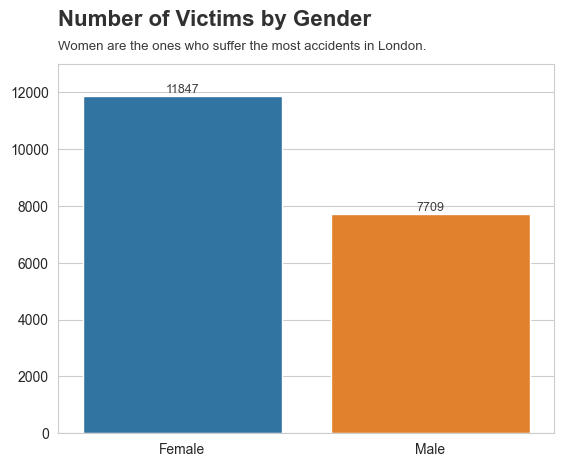

In [5]:
p1 = df[df['Victims Sex'] != 'Unknown']

ax = sns.countplot(x = p1['Victims Sex'].sort_values())
plt.title('Number of Victims by Gender', fontsize = 16, y = 1.08, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos x e y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo y
ax.set_ylim(0, 13000)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
ax.text(x = -0.5, 
        y = 13500,
        s = 'Women are the ones who suffer the most accidents in London.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

**Qual faixa etária esteve mais envolvida nos incidentes?**

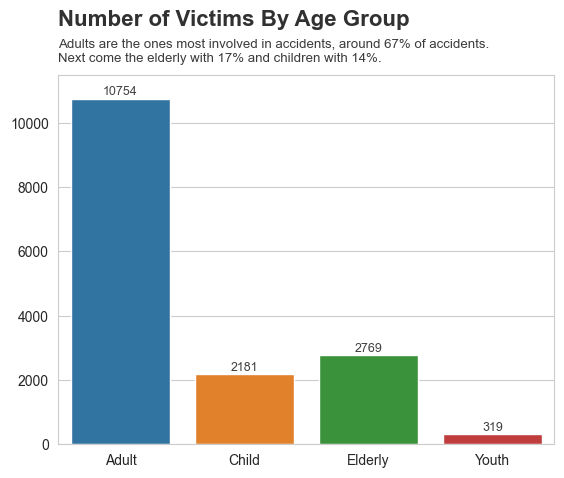

In [6]:
p2 = df[df['Victims Age'] != 'Unknown']

ax = sns.countplot(x = p2['Victims Age'].sort_values())
plt.title('Number of Victims By Age Group', fontsize = 16, y = 1.11, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos x e y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo y
ax.set_ylim(0, 11500)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
ax.text(x = -0.5, 
        y = 11900,
        s = 'Adults are the ones most involved in accidents, around 67% of accidents. \nNext come the elderly with 17% and children with 14%.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

**Qual o percentual de incidentes por tipo de evento (Incident Event Type)?**

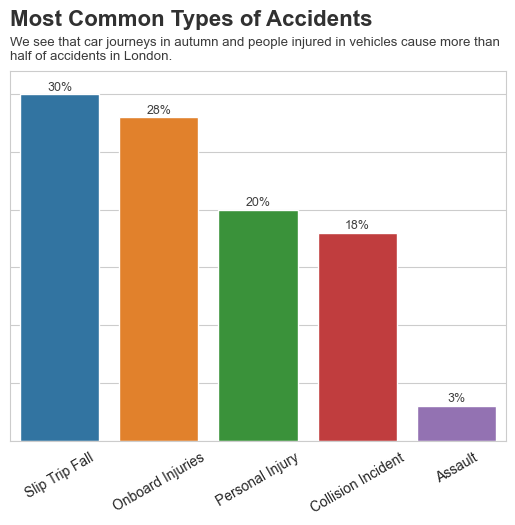

In [7]:
p3 = df['Incident Event Type'].value_counts(normalize = True).round(2) * 100
p3 = pd.DataFrame(p3).reset_index()
p3 = p3[p3['proportion'] > 0.1]

ax = sns.barplot(data = p3, x = 'Incident Event Type', y = 'proportion')
plt.title('Most Common Types of Accidents', fontsize = 16, y = 1.1, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos X e Y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo Y
ax.set_ylim(0, 32)

# Rotacionando os valores do eixo X
plt.xticks(rotation = 30)

# Removendo os valores do eixo Y
plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

# Adicione números nas barras
for p in ax.patches:
    value = int(p.get_height())  # Calcula o valor com base na proporção
    ax.annotate(f'{value}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), alpha=0.75, textcoords='offset points')
    
# Adicionando subtítulo
ax.text(x = -0.5, 
        y = 33,
        s = 'We see that car journeys in autumn and people injured in vehicles cause more than \nhalf of accidents in London.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

**Como foi a evolução de incidentes por mês ao longo do tempo?**

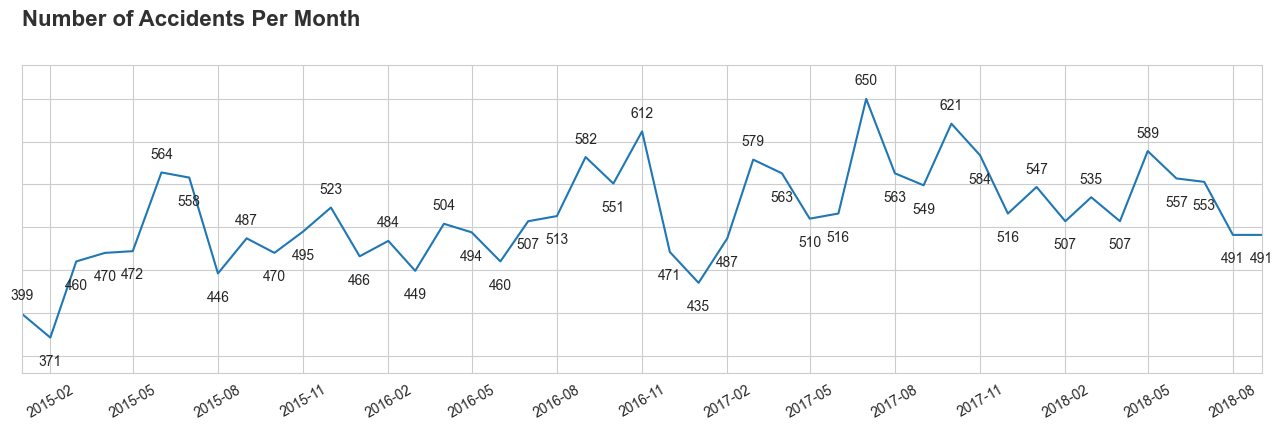

In [8]:
fig, ax = plt.subplots(figsize=(16, 4))

p4 = df.groupby('Date Of Incident').agg({'Victims Age': 'count'}).reset_index()
p4 = p4.rename(columns = {'Victims Age': 'Total Number of Victims'})

# Plot
ax.plot(p4['Date Of Incident'], p4['Total Number of Victims']);
plt.title('Number of Accidents Per Month', fontsize = 16, y = 1.1, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Mostrando os valores do eixo X de 3 em 3 meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

# Ajustando o eixo Y
ax.set_ylim(330, 690)

# Removendo os valores do eixo Y
plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

# Ajustando os limites do início e fim do gráfico
ax.set_xlim(p4['Date Of Incident'].min(), p4['Date Of Incident'].max())

# Rotacionando os valores do eixo X
plt.xticks(rotation = 30)

# Adicionando os valores no topo da linha
for i, (date, value) in enumerate(zip(p4['Date Of Incident'], p4['Total Number of Victims'])):
    if i == 0:
        offset = 10
    elif i == len(p4) - 1:
        offset = -20
    else:
        prev_value = p4['Total Number of Victims'].iloc[i - 1]
        next_value = p4['Total Number of Victims'].iloc[i + 1]
        if value >= prev_value and value >= next_value:
            offset = 10
        else:
            offset = -20
    
    ax.annotate(value, (date, value), textcoords = 'offset points', xytext=(0, offset), ha='center')
    
plt.show()

**Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?**

In [9]:
# Filtrando os dados pelas condições desejadas
p5 = df[(df['Incident Event Type'] == 'Collision Incident') & (df['Victims Sex'] == 'Female')]
p5['Mês'] = p5['Date Of Incident'].dt.month
p5 = p5.groupby('Mês').agg({'Victims Sex': 'count'}).reset_index()
p5

meses = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

p5['Mês'] = p5['Mês'].map(meses)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13636\1398031801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p5['Mês'] = p5['Date Of Incident'].dt.month


Text(-0.5, 176, 'September is the month with the highest number of accidents involving women, followed by June, July and April. Highlight is the month of December with the \nlowest number of accidents recorded.')

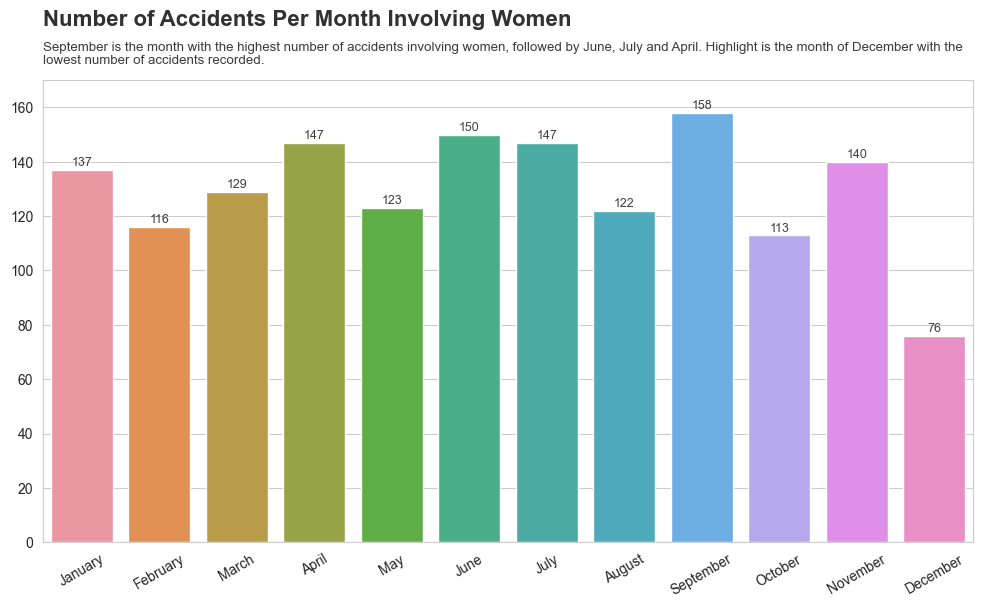

In [10]:
# Configurando tamanho do gráfico
plt.figure(figsize = (12, 6))

# Plot
ax = sns.barplot(data = p5, x = 'Mês', y = 'Victims Sex')
plt.title('Number of Accidents Per Month Involving Women', fontsize = 16, y = 1.1, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos X e Y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo Y
ax.set_ylim(0, 170)

# Rotacionando os valores do eixo X
plt.xticks(rotation = 30)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
# Adicionando subtítulo
ax.text(x = -0.5, 
        y = 176,
        s = 'September is the month with the highest number of accidents involving women, followed by June, July and April. Highlight is the month of December with the \nlowest number of accidents recorded.',
        fontsize = 9.5, 
        alpha = .90)

**Qual foi a média de incidentes por mês envolvendo crianças (Child)?**

In [11]:
p6 = df[df['Victims Age'] == 'Child']
p6['Ano'] = p6['Date Of Incident'].dt.year
p6['Mês'] = p6['Date Of Incident'].dt.month
p6 = p6.groupby(['Ano', 'Mês']).agg({'Victims Age': 'count'}).reset_index()
p6 = p6.groupby('Mês')['Victims Age'].mean().round(2).reset_index()

p6['Mês'] = p6['Mês'].map(meses)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13636\1401003186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p6['Ano'] = p6['Date Of Incident'].dt.year
C:\Users\Matheus\AppData\Local\Temp\ipykernel_13636\1401003186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p6['Mês'] = p6['Date Of Incident'].dt.month


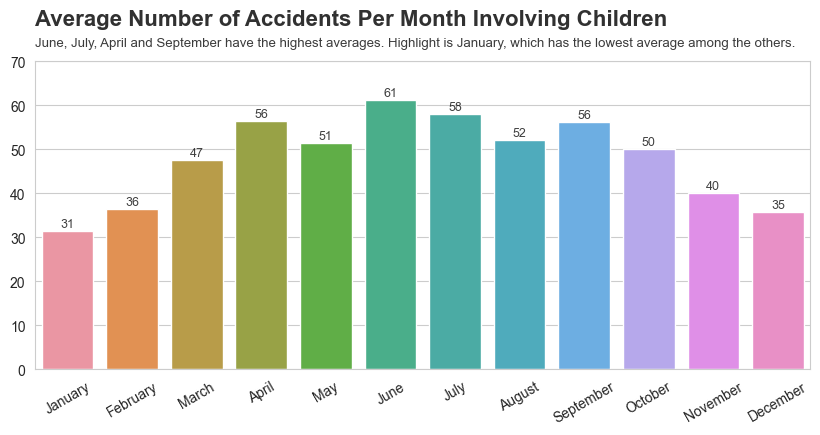

In [12]:
# Configurando tamanho do gráfico
plt.figure(figsize = (10, 4))

# Plot
ax = sns.barplot(data = p6, x = 'Mês', y = 'Victims Age')
plt.title('Average Number of Accidents Per Month Involving Children', fontsize = 16, y = 1.09, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos X e Y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo Y
ax.set_ylim(0, 70)

# Rotacionando os valores do eixo X
plt.xticks(rotation = 30)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
# Adicionando subtítulo
ax.text(x = -0.5, 
        y = 73.5,
        s = 'June, July, April and September have the highest averages. Highlight is January, which has the lowest average among the others.',
        fontsize = 9.5, 
        alpha = .90)

plt.show()

**Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?**

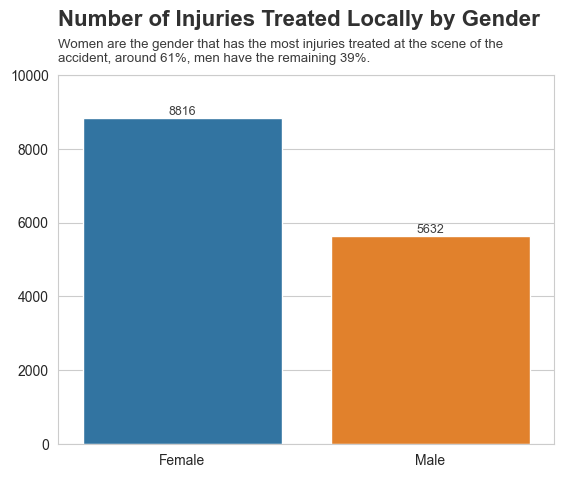

In [13]:
p7 = df[df['Injury Result Description'] == 'Injuries treated on scene']
p7 = p7[p7['Victims Sex'] != 'Unknown']


ax = sns.countplot(x = p7['Victims Sex'].sort_values())
plt.title('Number of Injuries Treated Locally by Gender', fontsize = 16, y = 1.11, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos x e y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo y
ax.set_ylim(0, 10000)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
ax.text(x = -0.5, 
        y = 10360,
        s = 'Women are the gender that has the most injuries treated at the scene of the \naccident, around 61%, men have the remaining 39%.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

In [14]:
p7['Victims Sex'].value_counts(normalize=True).round(2)

Victims Sex
Female    0.61
Male      0.39
Name: proportion, dtype: float64

**No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?**

In [15]:
p8 = df[(df['Year'] == 2017) & (df['Victims Age'] == 'Elderly')]
p8['Mês'] = p8['Date Of Incident'].dt.month
p8['Mês'] = p8['Mês'].map(meses)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13636\3988789314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p8['Mês'] = p8['Date Of Incident'].dt.month
C:\Users\Matheus\AppData\Local\Temp\ipykernel_13636\3988789314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p8['Mês'] = p8['Mês'].map(meses)


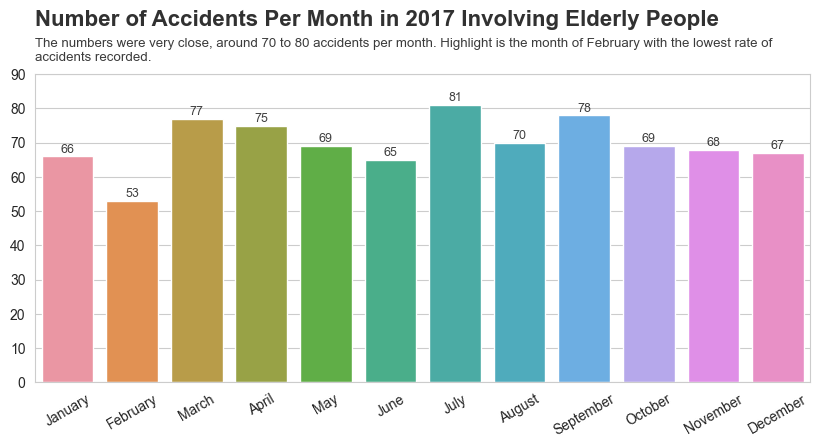

In [16]:
# Configurando tamanho do gráfico
plt.figure(figsize = (10, 4))

# Plot
ax = sns.countplot(x = p8['Mês'])
plt.title('Number of Accidents Per Month in 2017 Involving Elderly People', fontsize = 16, y = 1.13, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos x e y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo y
ax.set_ylim(0, 90)

# Rotacionando os valores do eixo X
plt.xticks(rotation = 30)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
ax.text(x = -0.5, 
        y = 94,
        s = 'The numbers were very close, around 70 to 80 accidents per month. Highlight is the month of February with the lowest rate of \naccidents recorded.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

**Considerando o Operador qual a distribuição de incidentes ao longo do tempo?**

In [28]:
p9 = df.groupby(['Operator', 'Date Of Incident']).agg({'Victims Age': 'count'}).reset_index()
p9 = p9.rename(columns = {'Victims Age': 'Total Number of Victims'})

In [27]:
# Plot
ax = px.line(p9, x = 'Date Of Incident', y = 'Total Number of Victims', facet_col = 'Operator', facet_col_wrap = 5)

# Adicione um título geral
ax.update_layout(title = 'Evolution of Accidents by Operator Over Time', title_x = 0.5)

# Ajustando tamanho da figura
ax.update_layout(width = 1000, height = 800, bargap = 0.2)

# Removendo as legendas dos eixos X e Y
ax.update_xaxes(title_text=None)
ax.update_yaxes(title_text=None)

# Ajustando os títulos de cada gráfico
ax.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

ax.show()

**Qual o tipo de incidente mais comum com ciclistas?**

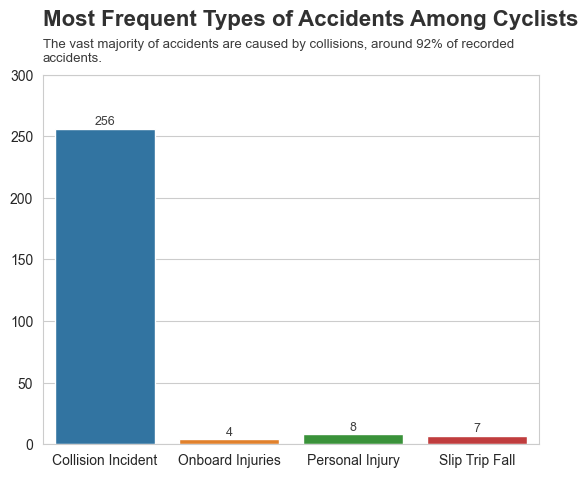

In [50]:
# Filtrando dados
p10 = df[df['Victim Category'] == 'Cyclist']

ax = sns.countplot(x = p10['Incident Event Type'].sort_values())
plt.title('Most Frequent Types of Accidents Among Cyclists', fontsize = 16, y = 1.11, loc = 'left', fontweight = 'bold', alpha = 0.95)

# Removendo a legenda dos eixos x e y
ax.set(xlabel = None, ylabel = None)

# Ajustando o eixo y
ax.set_ylim(0, 300)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', fontsize = 9, color = 'black', xytext=(0, 5),
                        alpha = 0.75, textcoords = 'offset points')
    
ax.text(x = -0.5, 
        y = 311,
        s = 'The vast majority of accidents are caused by collisions, around 92% of recorded \naccidents.',
        fontsize = 9.5, 
        alpha = .90);

plt.show()

In [48]:
p10['Incident Event Type'].value_counts(normalize=True).round(2)

Incident Event Type
Collision Incident    0.93
Personal Injury       0.03
Slip Trip Fall        0.03
Onboard Injuries      0.01
Name: proportion, dtype: float64